https://nsidc.org/data/MOD10C2

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 154 GB / percent used: 38.7 %


In [2]:
path = '/data/mlalande/MODIS/MOD10CM/test/MOD10C2.A2000049.006.2016064132927.hdf'

In [4]:
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:                       (XDim:MOD_CMG_Snow_5km: 7200, YDim:MOD_CMG_Snow_5km: 3600)
Dimensions without coordinates: XDim:MOD_CMG_Snow_5km, YDim:MOD_CMG_Snow_5km
Data variables:
    Eight_Day_CMG_Snow_Cover      (YDim:MOD_CMG_Snow_5km, XDim:MOD_CMG_Snow_5km) float32 ...
    Eight_Day_CMG_Clear_Index     (YDim:MOD_CMG_Snow_5km, XDim:MOD_CMG_Snow_5km) float32 ...
    Eight_Day_CMG_Cloud_Obscured  (YDim:MOD_CMG_Snow_5km, XDim:MOD_CMG_Snow_5km) float32 ...
    Snow_Spatial_QA               (YDim:MOD_CMG_Snow_5km, XDim:MOD_CMG_Snow_5km) float32 ...
Attributes:
    HDFEOSVersion:                     HDFEOS_V2.17
    StructMetadata.0:                  GROUP=SwathStructure\nEND_GROUP=SwathS...
    CoreMetadata.0:                    \nGROUP                  = INVENTORYME...
    ArchiveMetadata.0:                 \nGROUP                  = ARCHIVEDMET...
    identifier_product_doi:            10.5067/MODIS/MOD10C2.006
    identifier_product_doi_authority:  http://dx.doi.org

In [6]:
ds.Eight_Day_CMG_Snow_Cover

<xarray.DataArray 'Eight_Day_CMG_Snow_Cover' (YDim:MOD_CMG_Snow_5km: 3600, XDim:MOD_CMG_Snow_5km: 7200)>
[25920000 values with dtype=float32]
Dimensions without coordinates: YDim:MOD_CMG_Snow_5km, XDim:MOD_CMG_Snow_5km
Attributes:
    long_name:                      Eight day snow cover extent, 5km
    units:                          none
    format:                         I3
    coordsys:                       latitude, longitude
    valid_range:                    [  0 100]
    Mask_value:                     254
    Night_value:                    111
    Water_mask_land_threshold (%):  12.0
    Antarctica_snow_note:           Antarctica deliberately mapped as snow
    Key:                            0-100=percent of snow in a cell, 107=lake...

In [7]:
ds.Eight_Day_CMG_Snow_Cover.Key

'0-100=percent of snow in a cell, 107=lake ice, 111=night, 237=inland water, 239=ocean, 250=cloud obscured water, 253=data not mapped, 255=fill'

In [8]:
file = path
ds = xr.open_dataset(path)

grid = xe.util.grid_global(d_lon=0.05, d_lat=0.05)

ds = ds.rename({"XDim:MOD_CMG_Snow_5km": "lon", "YDim:MOD_CMG_Snow_5km": "lat"})
ds = ds.assign_coords({"lon": grid.lon[0].values, "lat": np.flip(grid.lat[:,0].values)})
ds

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xesmf/util.py:91: UserWarning: 360 cannot be divided by d_lon = 0.05, might not cover the globe uniformally
  warnings.warn('360 cannot be divided by d_lon = {}, '
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xesmf/util.py:95: UserWarning: 180 cannot be divided by d_lat = 0.05, might not cover the globe uniformally
  warnings.warn('180 cannot be divided by d_lat = {}, '


<xarray.Dataset>
Dimensions:                       (lat: 3600, lon: 7200)
Coordinates:
  * lon                           (lon) float64 -180.0 -179.9 ... 179.9 180.0
  * lat                           (lat) float64 89.97 89.92 ... -89.93 -89.97
Data variables:
    Eight_Day_CMG_Snow_Cover      (lat, lon) float32 ...
    Eight_Day_CMG_Clear_Index     (lat, lon) float32 ...
    Eight_Day_CMG_Cloud_Obscured  (lat, lon) float32 ...
    Snow_Spatial_QA               (lat, lon) float32 ...
Attributes:
    HDFEOSVersion:                     HDFEOS_V2.17
    StructMetadata.0:                  GROUP=SwathStructure\nEND_GROUP=SwathS...
    CoreMetadata.0:                    \nGROUP                  = INVENTORYME...
    ArchiveMetadata.0:                 \nGROUP                  = ARCHIVEDMET...
    identifier_product_doi:            10.5067/MODIS/MOD10C2.006
    identifier_product_doi_authority:  http://dx.doi.org

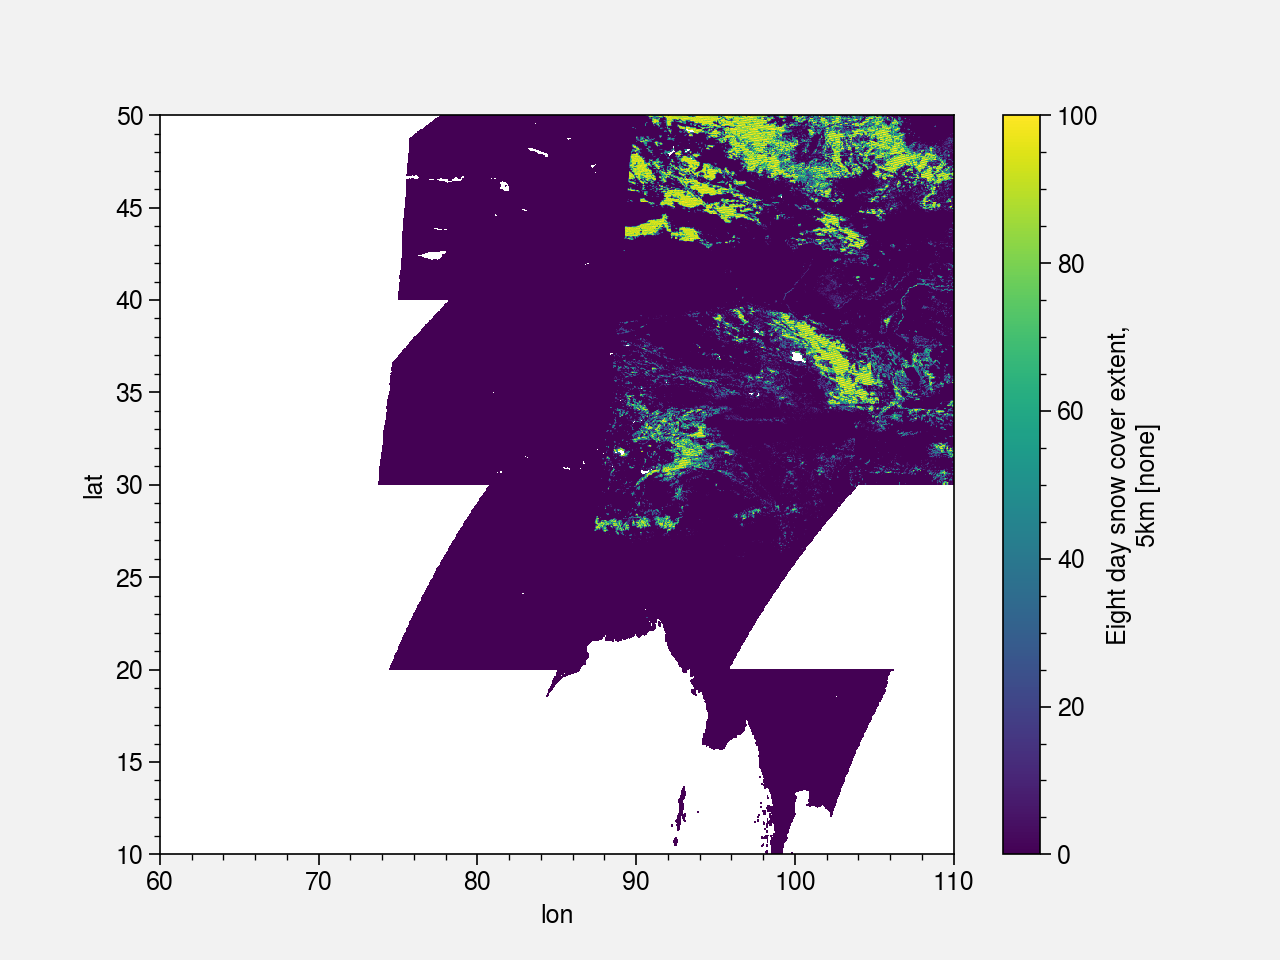

In [9]:
latlim=(10,50)
lonlim=(60,110)

Eight_Day_CMG_Snow_Cover = ds.sel(lat=slice(latlim[1],latlim[0]), lon=slice(lonlim[0],lonlim[1])).Eight_Day_CMG_Snow_Cover
Eight_Day_CMG_Snow_Cover

snc = Eight_Day_CMG_Snow_Cover.where(Eight_Day_CMG_Snow_Cover <= 100)

snc.plot()

In [17]:
Snow_Spatial_QA

<xarray.DataArray 'Snow_Spatial_QA' (lat: 800, lon: 1000)>
array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [254., 254., 254., ..., 254., 254., 254.],
       [254., 254., 254., ..., 254., 254., 254.],
       [254., 254., 254., ..., 254., 254., 254.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 60.03 60.08 60.13 60.18 ... 109.8 109.9 109.9 110.0
  * lat      (lat) float64 49.97 49.92 49.87 49.82 ... 10.17 10.12 10.07 10.02
Attributes:
    long_name:             Thematic QA map of the monthly snow
    units:                 none
    format:                I3
    coordsys:              latitude, longitude
    valid_range:           [0 1]
    Cell_resolution:       0.05 deg
    Antarctica_snow_note:  Antarctica deliberately mapped as snow
    Key:                   0=good quality, 1=other quality, 252=Antarctica ma...

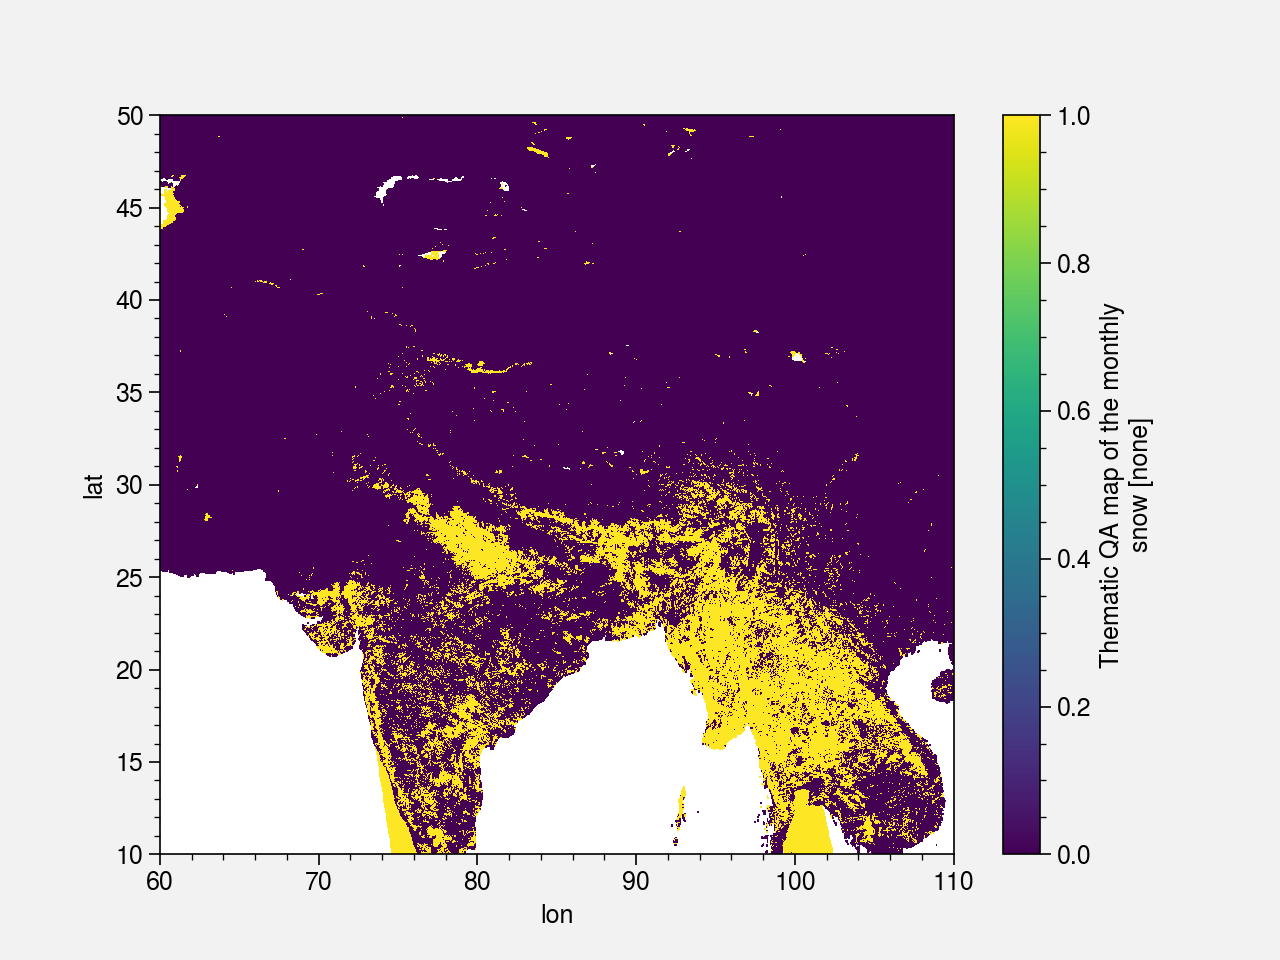

In [16]:
latlim=(10,50)
lonlim=(60,110)

Snow_Spatial_QA = ds.sel(lat=slice(latlim[1],latlim[0]), lon=slice(lonlim[0],lonlim[1])).Snow_Spatial_QA
Snow_Spatial_QA

Snow_Spatial_QA.where(Snow_Spatial_QA<=1).plot()